# O que o código faz:

- Treina uma árvore de decisão com profundidade variando de 1 a 5 e também sem limite de profundidade (max_depth=None).

- Plota a árvore de decisão para cada valor de profundidade.

- Exibe a importância das features (quais variáveis o modelo mais usa para fazer as previsões).

- Exibe a acurácia da árvore no conjunto de teste e o coeficiente de importância das features.

# O que observar:

- Visualização da árvore: À medida que aumenta a profundidade (max_depth), a árvore se torna mais complexa, com mais divisões.

- Importância das features: Veja como as features influenciam a decisão da árvore. Isso é crucial para entender como o modelo está “pensando”.

- Acurácia: Se a acurácia continuar aumentando à medida que você aumenta o max_depth, pode ser sinal de overfitting (se a acurácia de treino for muito alta e a de teste muito baixa).

# Dicas para testes futuros:

- Experimente valores diferentes de max_depth (ex.: 2, 4, 6).

- Tente também usar parâmetros como min_samples_split e min_samples_leaf para ver como eles afetam o desempenho.

- Se observar overfitting, tente limitar a profundidade e veja como a performance se ajusta.

In [1]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


In [2]:

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target


In [3]:
# Divisão dos dados em treino e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:

# Função para treinar e plotar a árvore de decisão com diferentes depths
def decision_tree_analysis(depth):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    
    # Predição e cálculo de acurácia
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    # Plotando a árvore
    plt.figure(figsize=(12,8))
    plot_tree(tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
    plt.title(f"Árvore de Decisão (max_depth={depth})")
    plt.show()
    
    # Mostrando a importância das features
    importances = tree.feature_importances_
    df_importances = pd.DataFrame({
        'feature': iris.feature_names,
        'importance': importances
    }).sort_values(by="importance", ascending=False)
    
    print(f"\nAcurácia (max_depth={depth}): {acc:.4f}")
    print("\nImportância das features:")
    print(df_importances)
    print("\nCoeficientes (1ª classe):", tree.feature_importances_)


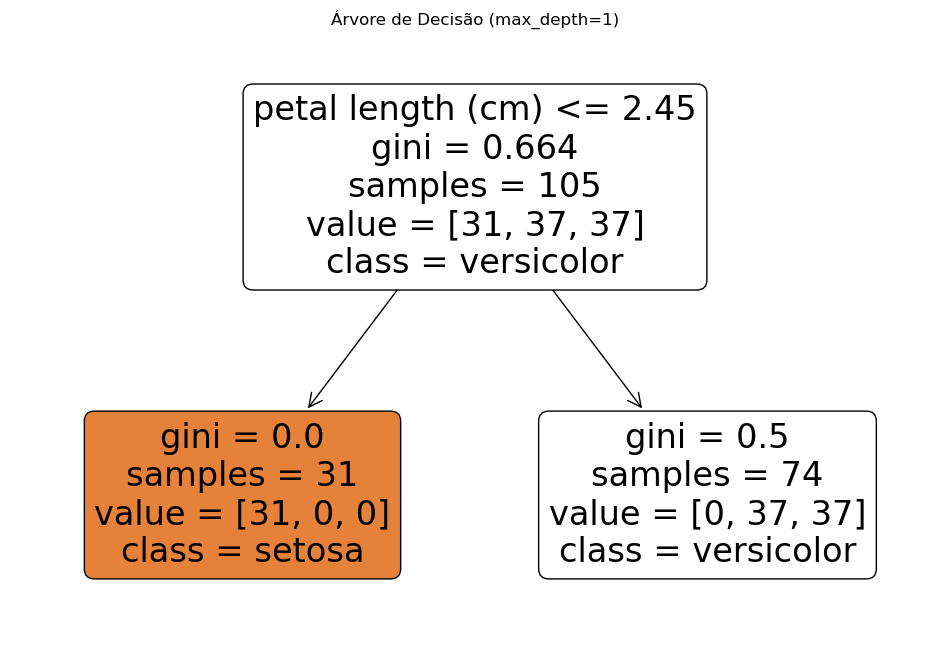


Acurácia (max_depth=1): 0.7111

Importância das features:
             feature  importance
2  petal length (cm)         1.0
0  sepal length (cm)         0.0
1   sepal width (cm)         0.0
3   petal width (cm)         0.0

Coeficientes (1ª classe): [0. 0. 1. 0.]


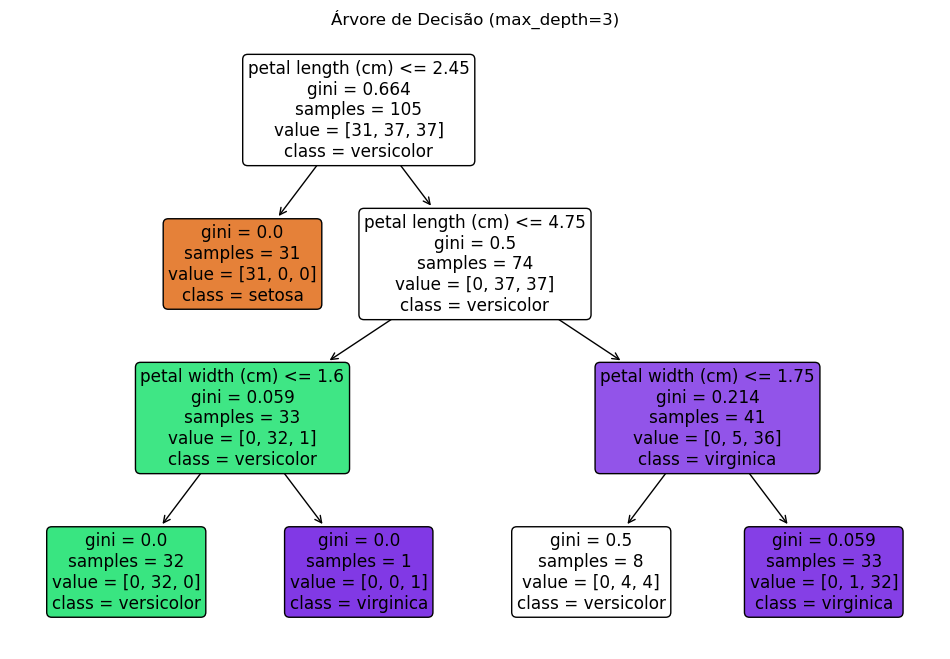


Acurácia (max_depth=3): 1.0000

Importância das features:
             feature  importance
2  petal length (cm)    0.925108
3   petal width (cm)    0.074892
0  sepal length (cm)    0.000000
1   sepal width (cm)    0.000000

Coeficientes (1ª classe): [0.         0.         0.92510833 0.07489167]


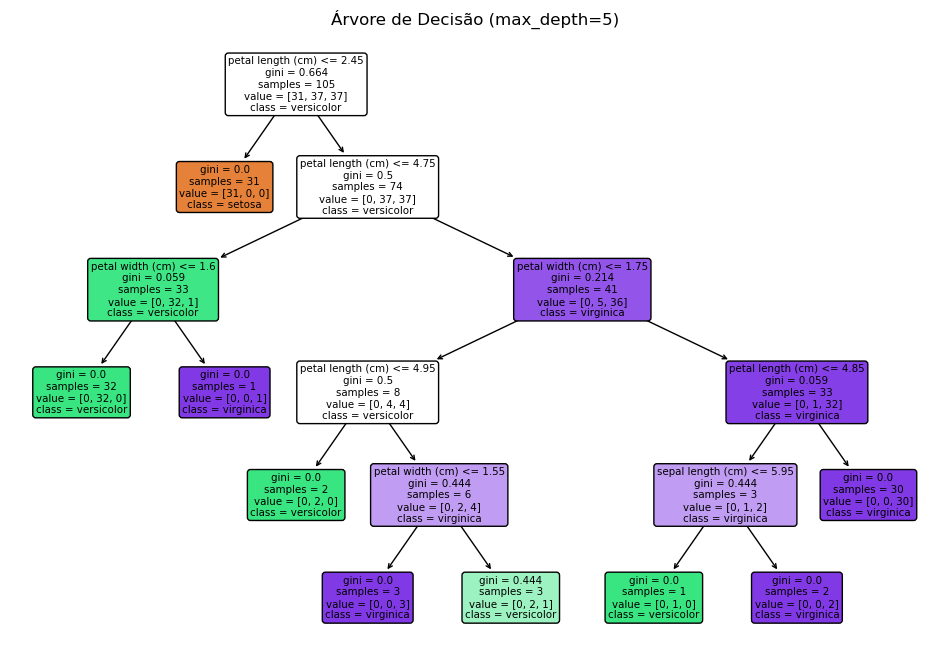


Acurácia (max_depth=5): 1.0000

Importância das features:
             feature  importance
2  petal length (cm)    0.891184
3   petal width (cm)    0.089334
0  sepal length (cm)    0.019482
1   sepal width (cm)    0.000000

Coeficientes (1ª classe): [0.01948233 0.         0.89118408 0.0893336 ]


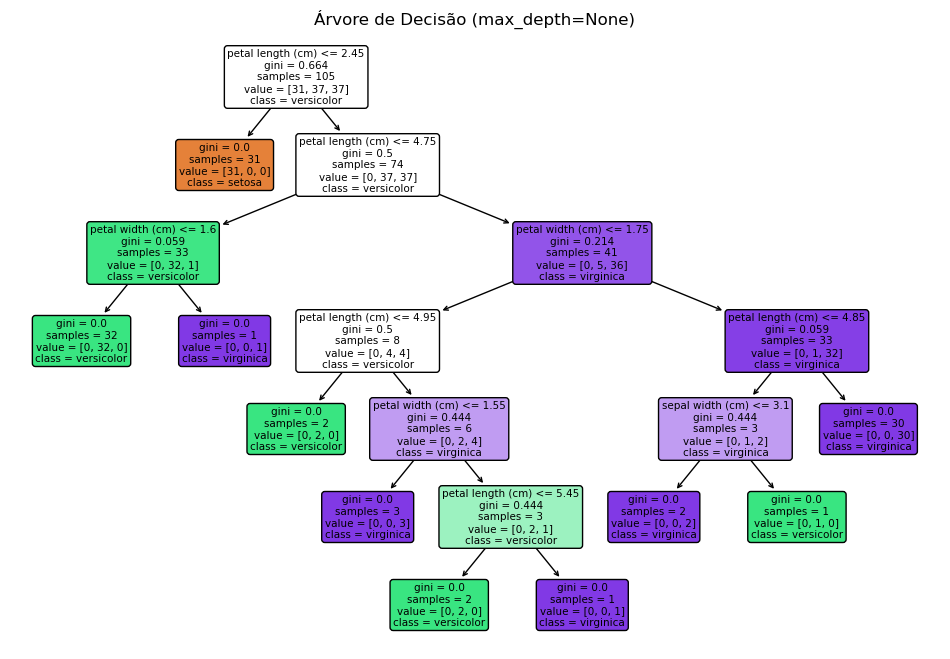


Acurácia (max_depth=None): 1.0000

Importância das features:
             feature  importance
2  petal length (cm)    0.893264
3   petal width (cm)    0.087626
1   sepal width (cm)    0.019110
0  sepal length (cm)    0.000000

Coeficientes (1ª classe): [0.         0.01911002 0.89326355 0.08762643]


In [5]:

# Rodando a função para diferentes profundidades
for depth in [1, 3, 5, None]:  # max_depth=1, 3, 5 e None
    decision_tree_analysis(depth)
